#### TRINA THEODORE
#### RA2011026020013

## Membership Woes

### Data Analysis
This phase involves understanding and exploring the dataset to gain insights into its structure, features, and patterns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the CSV file and displaying the first five rows
data = pd.read_csv('Membership woes.csv')
data.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [3]:
#Checking the number of rows and columns present
data.shape

(10362, 15)

In [4]:
#Checking the datatypes of the each column in the dataframe
data.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [5]:
#Checking for null values
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

### Data Preprocessing
In this phase, the dataset is prepared for model training. 
##### <b>Eliminating the null values</b>
Elimation of null values is necessary as training a model with missing data can lead to poor performance. 

In [6]:
data['MEMBER_ANNUAL_INCOME'].fillna(data['MEMBER_ANNUAL_INCOME'].mean(), inplace=True)

Since Annual Income is numerical, we can impute with a mean of the values

In [7]:
data['MEMBER_OCCUPATION_CD'].fillna(data['MEMBER_OCCUPATION_CD'].median(), inplace=True)

We can impute with a median of the values in Member Occupation so that there are no outliers

In [8]:
data = data.drop(columns=['END_DATE  (YYYYMMDD)'])

End Date can be dropped, since Membership Status contains the same information

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()
data['MEMBER_GENDER'] = lb.fit_transform(data['MEMBER_GENDER'])
data['MEMBER_MARITAL_STATUS'] = lb.fit_transform(data['MEMBER_MARITAL_STATUS'])

Since both Member Gender and Marital Status are categorical, we assign a unique integer to each category

In [11]:
data.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               0
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
dtype: int64

Now, all null values have been eliminated.</br>
##### <b>Cleaning the dataset</b></br>
The dataset is converted to numerical values to make it suitable for training a Machine Learning model

In [12]:
data = data.drop(columns=['MEMBERSHIP_NUMBER'])
data = data.drop(columns=['AGENT_CODE'])

Both Membership Number and Agent Code are not relevant to the analysis, and are dropped

In [13]:
#Analysing the distribution of values in the Membership Package column  
d1 = data['MEMBERSHIP_PACKAGE'].value_counts()
d1

MEMBERSHIP_PACKAGE
TYPE-B    6809
TYPE-A    3553
Name: count, dtype: int64

In [14]:
#We can see that it is categorical, therefore, it can be encoded
lb = LabelEncoder()
data['MEMBERSHIP_PACKAGE'] = lb.fit_transform(data['MEMBERSHIP_PACKAGE'])

Repeating the same process for Payment Mode

In [15]:
d2 = data['PAYMENT_MODE'].value_counts()
d2

PAYMENT_MODE
ANNUAL            6589
MONTHLY           1881
SEMI-ANNUAL       1493
QUARTERLY          390
SINGLE-PREMIUM       9
Name: count, dtype: int64

In [16]:
lb = LabelEncoder()
data['PAYMENT_MODE'] = lb.fit_transform(data['PAYMENT_MODE'])

In [17]:
#The updated data types
data.dtypes

MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS      int64
MEMBER_GENDER              int64
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE         int64
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE               int64
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
dtype: object

#### Visualising the distributions and relationships

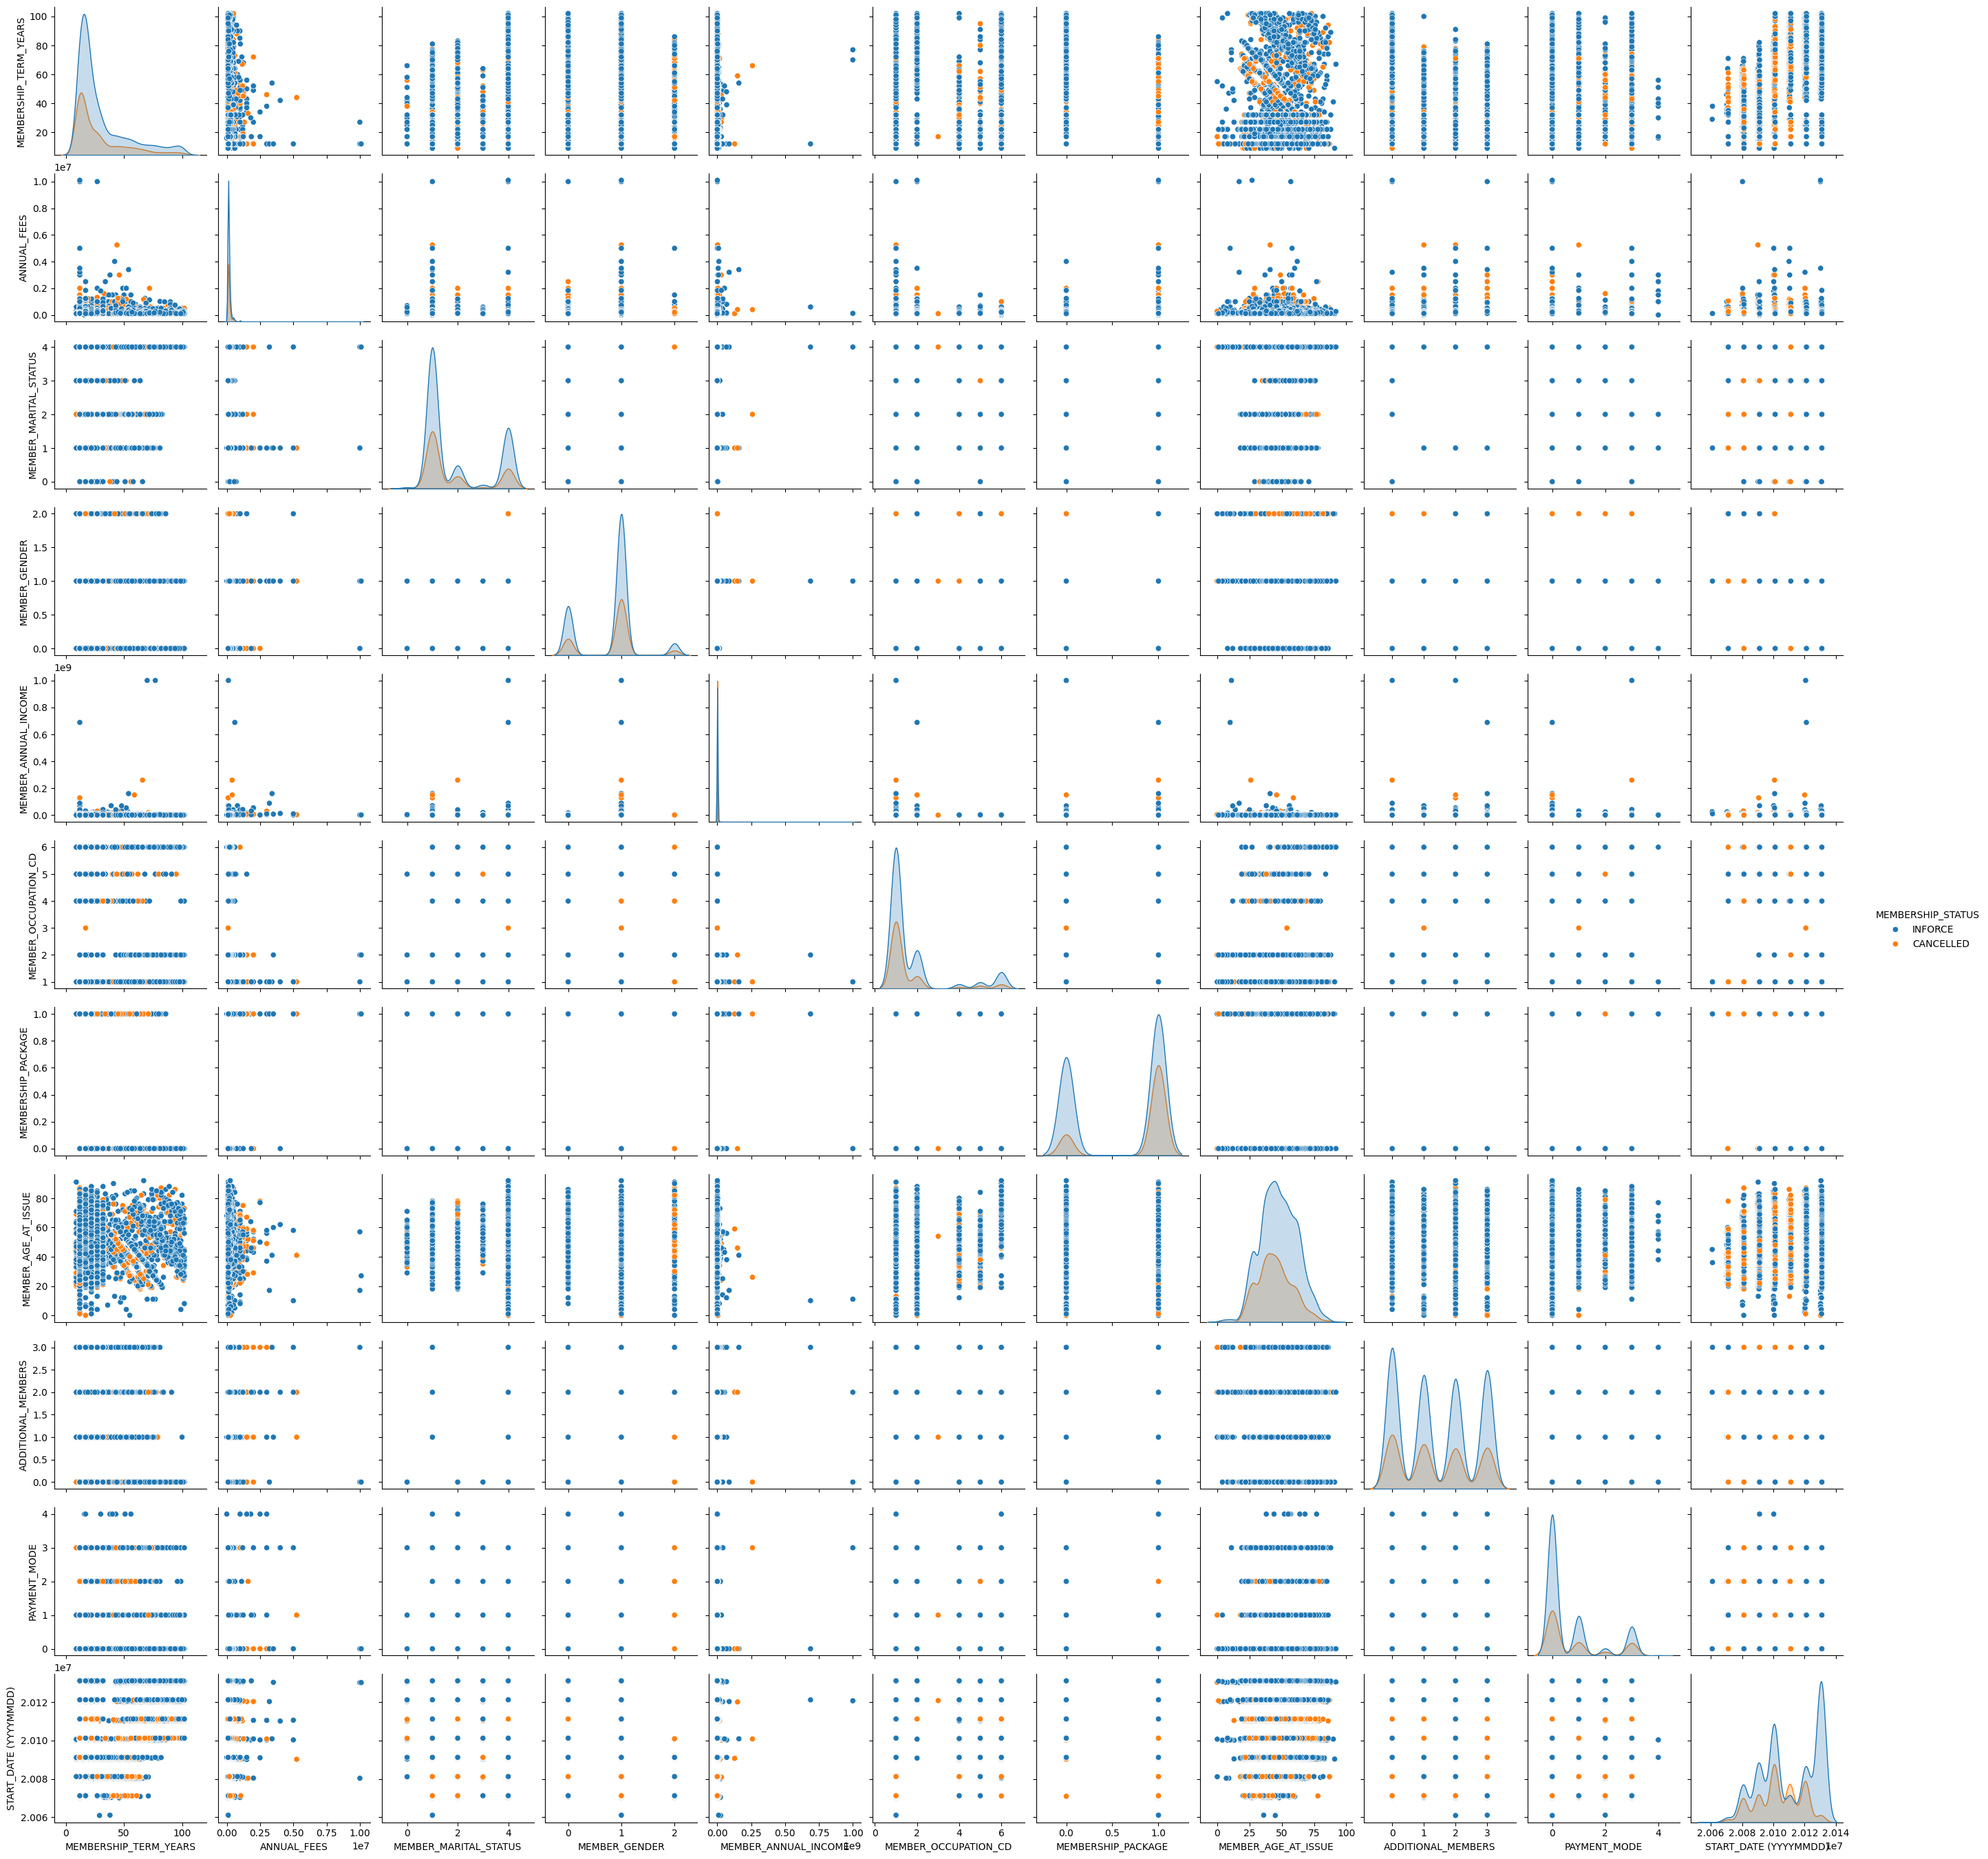

In [18]:
sns.pairplot(data, hue='MEMBERSHIP_STATUS')
plt.show()

In [19]:
lb = LabelEncoder()
data['MEMBERSHIP_STATUS'] = lb.fit_transform(data['MEMBERSHIP_STATUS'])

Membership Status is categorical, therefore, it is encoded with a label

### Training and Testing the Model
In this phase, the preprocessed dataset is used to train and test the Machine Learning model.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

x = data.drop('MEMBERSHIP_STATUS', axis=1)
y = data['MEMBERSHIP_STATUS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train)) 
    print('Testing Score',model.score(x_test,y_test))

#### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
m1 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5) 
m1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=70)

In [23]:
train_test_score(m1)

Training Score 0.739293038967306
Testing Score 0.7414375301495417


In [24]:
ypred_m1 = m1.predict(x_test)
ypred_proba_m1 = m1.predict_proba(x_test)[:, 1]
print(ypred_proba_m1)

[0.51708001 0.85774349 0.64456892 ... 0.51278152 0.73494629 0.63985042]


#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier 

In [26]:
m2 = DecisionTreeClassifier(criterion='gini',max_depth=5) 
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
train_test_score(m2)

Training Score 0.7438774279165159
Testing Score 0.7428847081524361


In [28]:
ypred_m2 = m2.predict(x_test)
ypred_proba_m2 = m2.predict_proba(x_test)[:, 1]
print(ypred_proba_m2)

[0.39506173 0.86486486 0.77446809 ... 0.59656652 0.81151832 0.64792899]


#### K Neighbours Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
m3 = KNeighborsClassifier(n_neighbors=23) 
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [31]:
train_test_score(m3)

Training Score 0.7225238267583545
Testing Score 0.6898215147129764


In [32]:
ypred_m3 = m3.predict(x_test)
ypred_proba_m3 = m3.predict_proba(x_test)[:, 1]
print(ypred_proba_m3)

[0.47826087 0.95652174 0.82608696 ... 0.52173913 0.60869565 0.65217391]


#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
m4 = LogisticRegression(max_iter=10000) 
m4.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [35]:
train_test_score(m4)

Training Score 0.6951381348775486
Testing Score 0.7013989387361312


In [36]:
ypred_m4 = m4.predict(x_test)
ypred_proba_m4 = m4.predict_proba(x_test)[:, 1]
print(ypred_proba_m4)

[0.69806799 0.69623364 0.69789711 ... 0.69848394 0.69782162 0.69699552]


### Analysing the model's performance
The model's performance is evaluated with Confusion Matrices and AUC curve (Area Under the Curve), often referred to as ROC (Receiver Operating Characteristic) curve.

In [37]:
#Function for Accuracy Score and Confusion Matrices
def gen_cls_metrics(ytest,ypred): 
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

#Function for AUC Curve
def gen_auc_metrics(ytest, ypred_proba, model_name=''):
    auc_score = roc_auc_score(ytest, ypred_proba)
    fpr, tpr, _ = roc_curve(ytest, ypred_proba)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    print(f'AUC Score ({model_name}): {auc_score:.4f}')

#### Random Forest

[[ 145  475]
 [  61 1392]]
              precision    recall  f1-score   support

           0       0.70      0.23      0.35       620
           1       0.75      0.96      0.84      1453

    accuracy                           0.74      2073
   macro avg       0.72      0.60      0.59      2073
weighted avg       0.73      0.74      0.69      2073



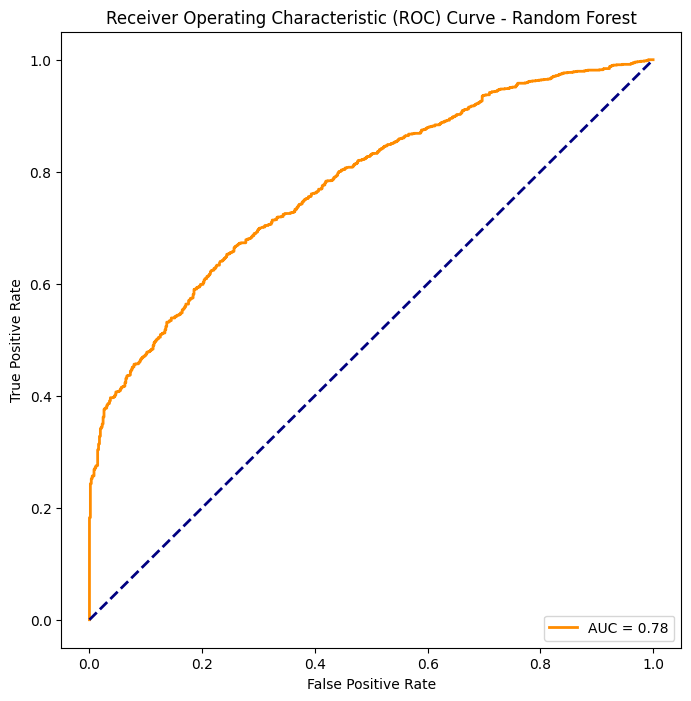

AUC Score (Random Forest): 0.7782


In [38]:
gen_cls_metrics(y_test,ypred_m1)
gen_auc_metrics(y_test, ypred_proba_m1, model_name='Random Forest')

#### Decision Tree

[[ 184  436]
 [  97 1356]]
              precision    recall  f1-score   support

           0       0.65      0.30      0.41       620
           1       0.76      0.93      0.84      1453

    accuracy                           0.74      2073
   macro avg       0.71      0.62      0.62      2073
weighted avg       0.73      0.74      0.71      2073



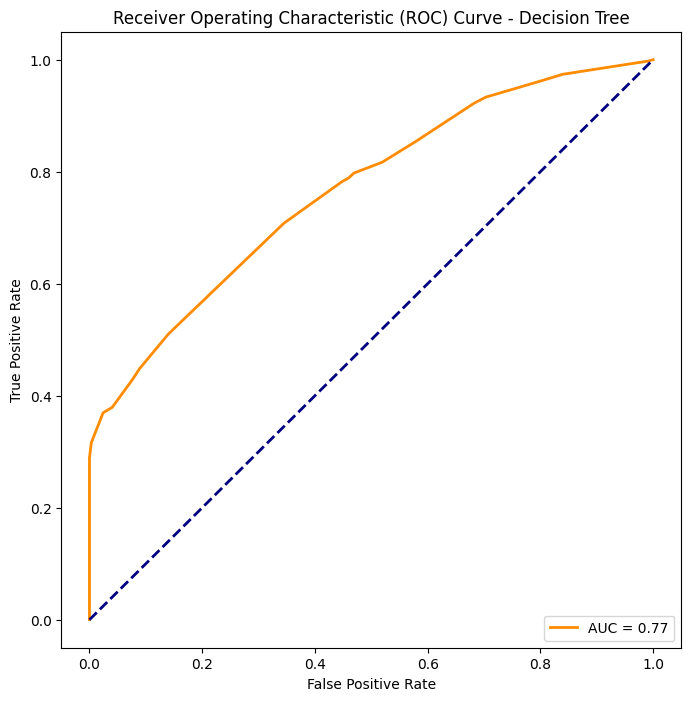

AUC Score (Decision Tree): 0.7668


In [39]:
gen_cls_metrics(y_test,ypred_m2)
gen_auc_metrics(y_test, ypred_proba_m2, model_name='Decision Tree')

#### K Neighbours Classifier

[[ 105  515]
 [ 128 1325]]
              precision    recall  f1-score   support

           0       0.45      0.17      0.25       620
           1       0.72      0.91      0.80      1453

    accuracy                           0.69      2073
   macro avg       0.59      0.54      0.53      2073
weighted avg       0.64      0.69      0.64      2073



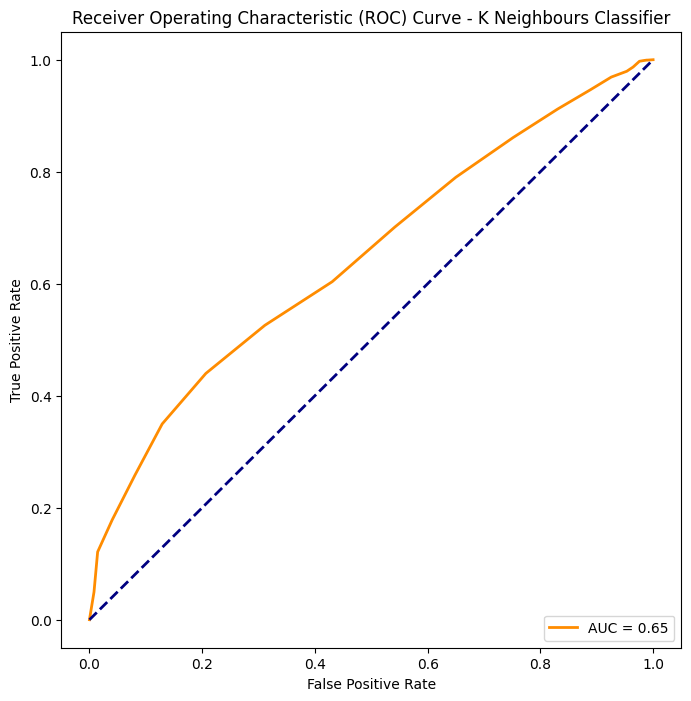

AUC Score (K Neighbours Classifier): 0.6465


In [40]:
gen_cls_metrics(y_test,ypred_m3)
gen_auc_metrics(y_test, ypred_proba_m3, model_name='K Neighbours Classifier')

#### Logistic Regression

[[   2  618]
 [   1 1452]]
              precision    recall  f1-score   support

           0       0.67      0.00      0.01       620
           1       0.70      1.00      0.82      1453

    accuracy                           0.70      2073
   macro avg       0.68      0.50      0.42      2073
weighted avg       0.69      0.70      0.58      2073



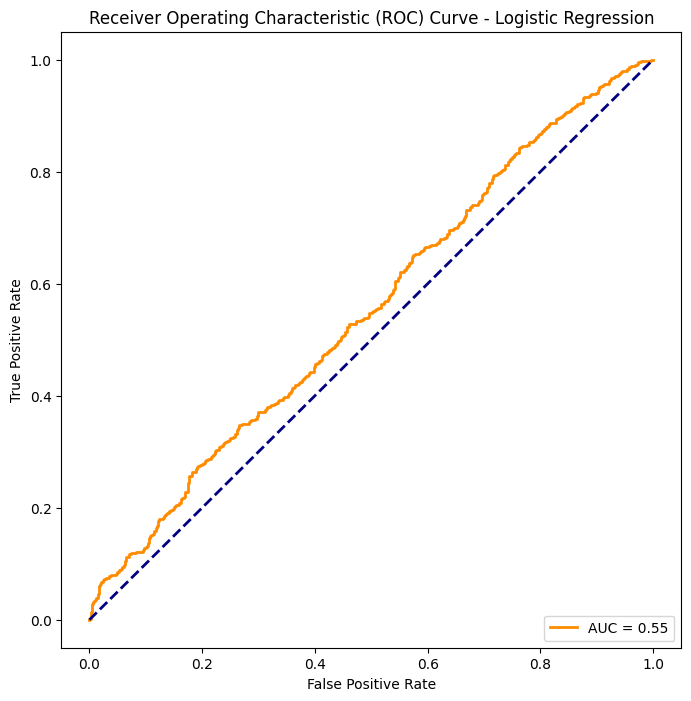

AUC Score (Logistic Regression): 0.5543


In [41]:
gen_cls_metrics(y_test,ypred_m4)
gen_auc_metrics(y_test, ypred_proba_m4, model_name='Logistic Regression')

### Conclusion

Our analysis aimed to address the challenge of identifying customers likely to cancel their premium club memberships. After thorough exploration and modelling, the Random Forest algorithm emerged as the most promising model, demonstrating a robust performance with an <b>Accuracy Score of 74%</b> and an <b>AUC Score of 0.7764</b></br></br>

<b>Model Performance:</b></br>
The Random Forest model exhibited a commendable <b>precision of 74%</b> and an impressive <b>recall of 96%</b>. This implies that the model is adept at correctly identiying a substantial portion of customers who eventually cancel their memberships. However, there is room for improvement in precision, particulary minimising false positives. </br></br>

<b>Confusion Matrix:</b></br>
The Confusion Matrix reveals that the model correctly identified <b>1392</b> instances of membership retention (<b>True Positive</b>) but struggled in correctly identifying membership cancellations (<b>True Negatives: 145</b>).</br></br>

<b>AUC Score:</b></br>
The <b>AUC Score of 0.7764</b> further reinforces the model's ability to discriminate between membership cancellations and retentions. This implies that when randomly selecting pairs of instances, the model correctly ranks them with the positive class having a higher predicted probability. </br></br>

In conclusion, the Random Forest model offers a valuable tool for identifying potential membership cancellations, enabling the premiun club to implement targeted strategies and improve overall customer satisfaction. Additionally, further exploration into influential features and customer engagement strategies may provide insights for proactive membership retention initiatves. 